<a href="https://colab.research.google.com/github/malaikact/Netflix-Exploratory-Data-Analysis/blob/main/Netflix_Titles_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Titles Exploratory Data Analysis**

**Introduction**\
The objective of this project is to perform exploratory data analysis on the data set "Netflix Movies and TV shows" using Python. Using visualization and statistical methods, we will be able to determinine the main characteristics of the data.


In [82]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## **About the data**

Fill in blurb

Objectives:\
The aim of the below analysis is to determine the following questions:


*   Which year produced the most content, both Movies and TV-Shows?
*   Which contries produce the most content?


*   Which category is more popular on Netflix? TV-Shows or Movies?

*   Who are the top actors on Netflix?
*   In which month is the most content uploaded?


*   Which rating of content does Netflix produce the most?








**Data Preparation**

In [52]:
# Import data
df = pd.read_csv("/netflix_titles.csv")

# Display first 5 rows of data
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [53]:
# Display last 5 rows of data
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [54]:
# Checking the data types of each attribute
df.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Removing Unnecessary Columns**\
After reviewing the attributes provided in the original data set against our listed objectives we can remove variables that will not aid in providing us with these answers. In this case, we will be removing show_id and description.

In [55]:
# Dropping unneeded columns
df = df.drop(['show_id', 'description'], axis=1)

# previewing first 5 rows of revised dataframe
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


**Looking for Duplicates**

In [56]:
df.shape

(8807, 10)

In [57]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


We can confirm that there are NO duplicate rows in the data. Yay!

**Checking for missing data**

In [58]:

missing_data = df.isna().sum().sort_values(ascending=False)
missing_data

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
listed_in          0
release_year       0
title              0
type               0
dtype: int64

We note that there are a notable amount of missing inputs in the director, country and cast columns. Along with a very minimal amount of missing inputs in the date_added, rating and duration columns.

**Changing the date format**\
Change the date format to be able to perform EDA with the data in the date_added column.


In [59]:
df['date_added']= pd.to_datetime(df['date_added'].str.strip(), format= "%B %d, %Y") 
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


# **Answering Our Questions**

**Which year produced the most content, both Movies and TV-Shows?**


In [60]:
# Confirming that we only have two "types", Movies and TV-Show
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


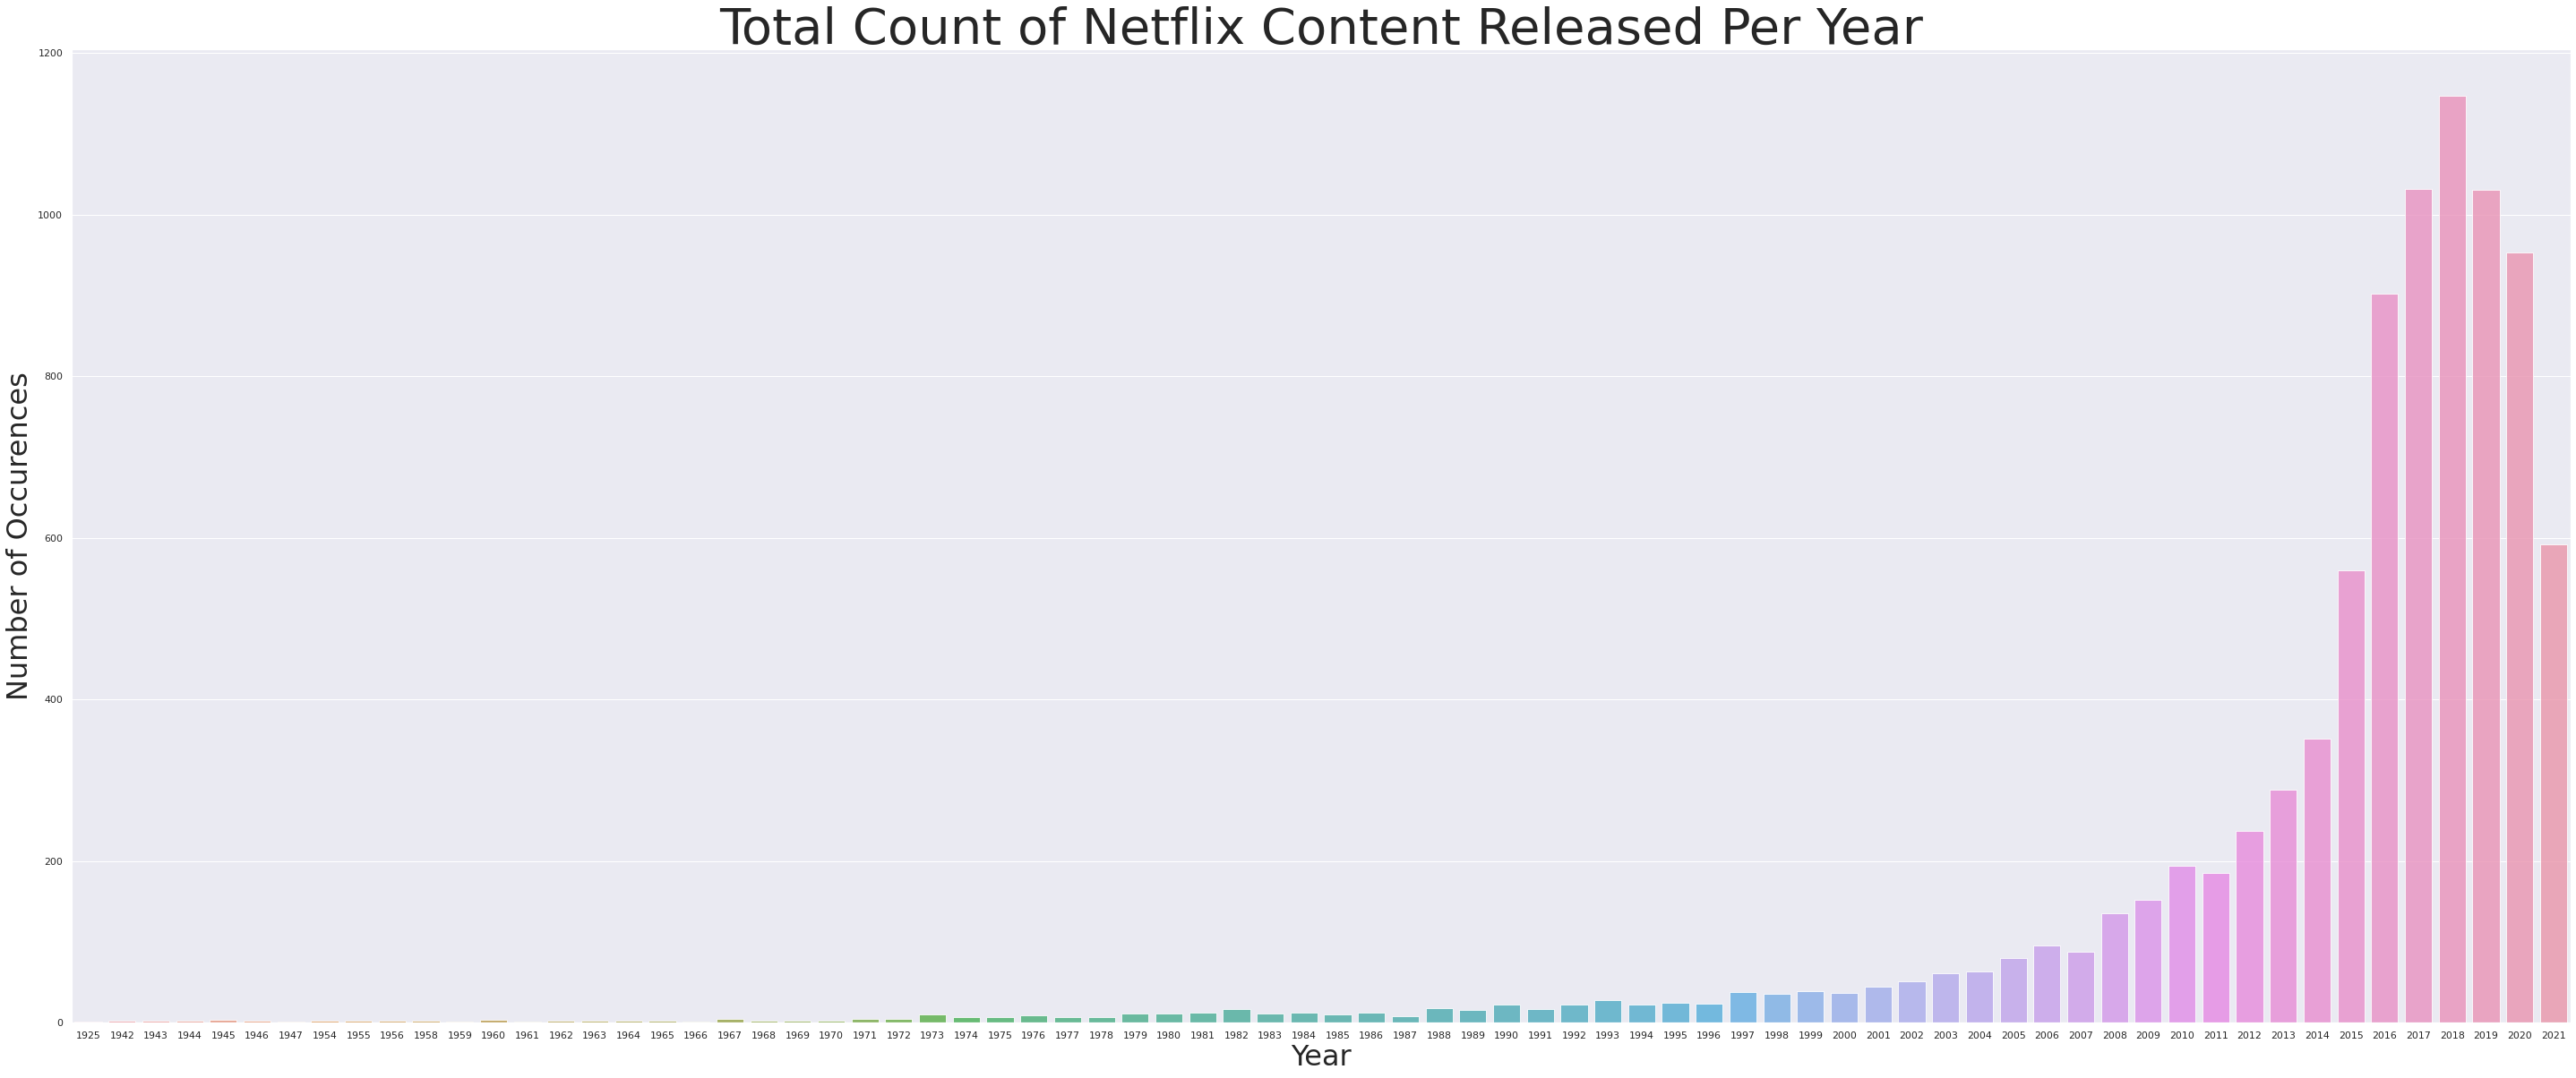

In [61]:
# Visualize the count of Movies and TV Shows released per year
release_count = df['release_year'].value_counts()
plt.figure(figsize=(50,20))
sns.barplot(release_count.index, release_count.values, alpha = 0.8)
plt.title('Total Count of Netflix Content Released Per Year', fontsize = 56)
plt.ylabel('Number of Occurences', fontsize = 32)
plt.xlabel('Year', fontsize = 32)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


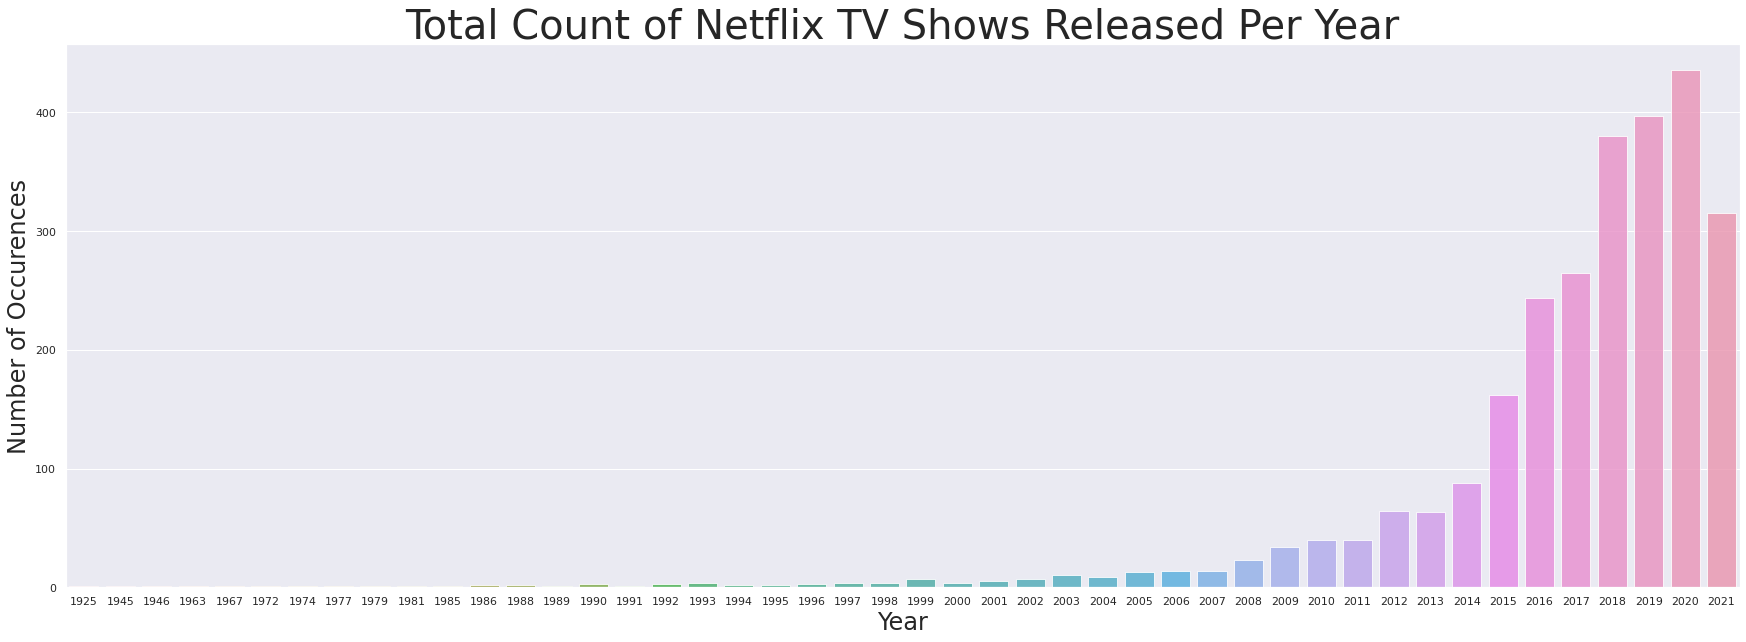

In [62]:
# Create and visualize a dataframe that excludes Movies
df_tv = df[df['type']=='TV Show']
tv_count = df_tv['release_year'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(tv_count.index, tv_count.values, alpha = 0.8)
plt.title('Total Count of Netflix TV Shows Released Per Year', fontsize = 40)
plt.ylabel('Number of Occurences', fontsize = 24)
plt.xlabel('Year', fontsize = 24)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


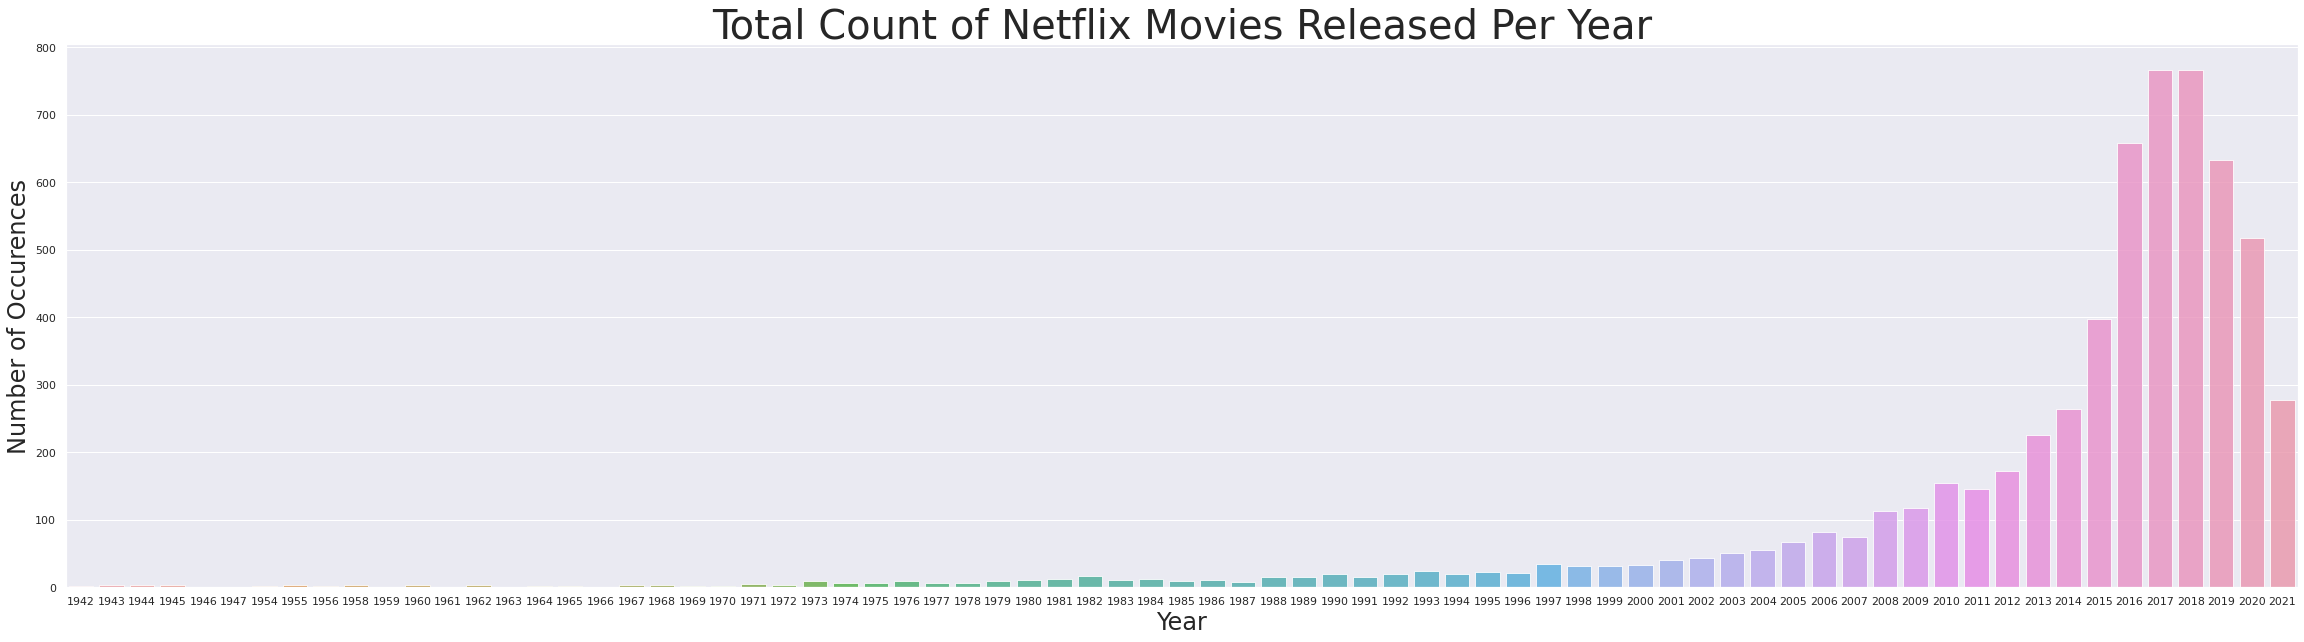

In [63]:
# Create and visualize a dataframe that excludes TV Shows 
df_movie = df[df['type']=='Movie']
movie_count = df_movie['release_year'].value_counts()
plt.figure(figsize=(40,10))
sns.barplot(movie_count.index, movie_count.values, alpha = 0.8)
plt.title('Total Count of Netflix Movies Released Per Year', fontsize = 40)
plt.ylabel('Number of Occurences', fontsize = 24)
plt.xlabel('Year', fontsize = 24)
plt.show()

We note that overall, the most content currently on netflix was released in the year 2018. We also note that there are more Movies released throughout the years than TV Shows.


**Which contries produce the most content?**

In [64]:
# Count of all countries that produce content.
country_count = df.country.value_counts()
country_count

United States                              2818
India                                       972
United Kingdom                              419
Japan                                       245
South Korea                                 199
                                           ... 
Taiwan, Hong Kong, United States, China       1
United Kingdom, United States, Canada         1
Spain, Mexico, France                         1
United Kingdom, France, Germany               1
United States, Kazakhstan                     1
Name: country, Length: 748, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


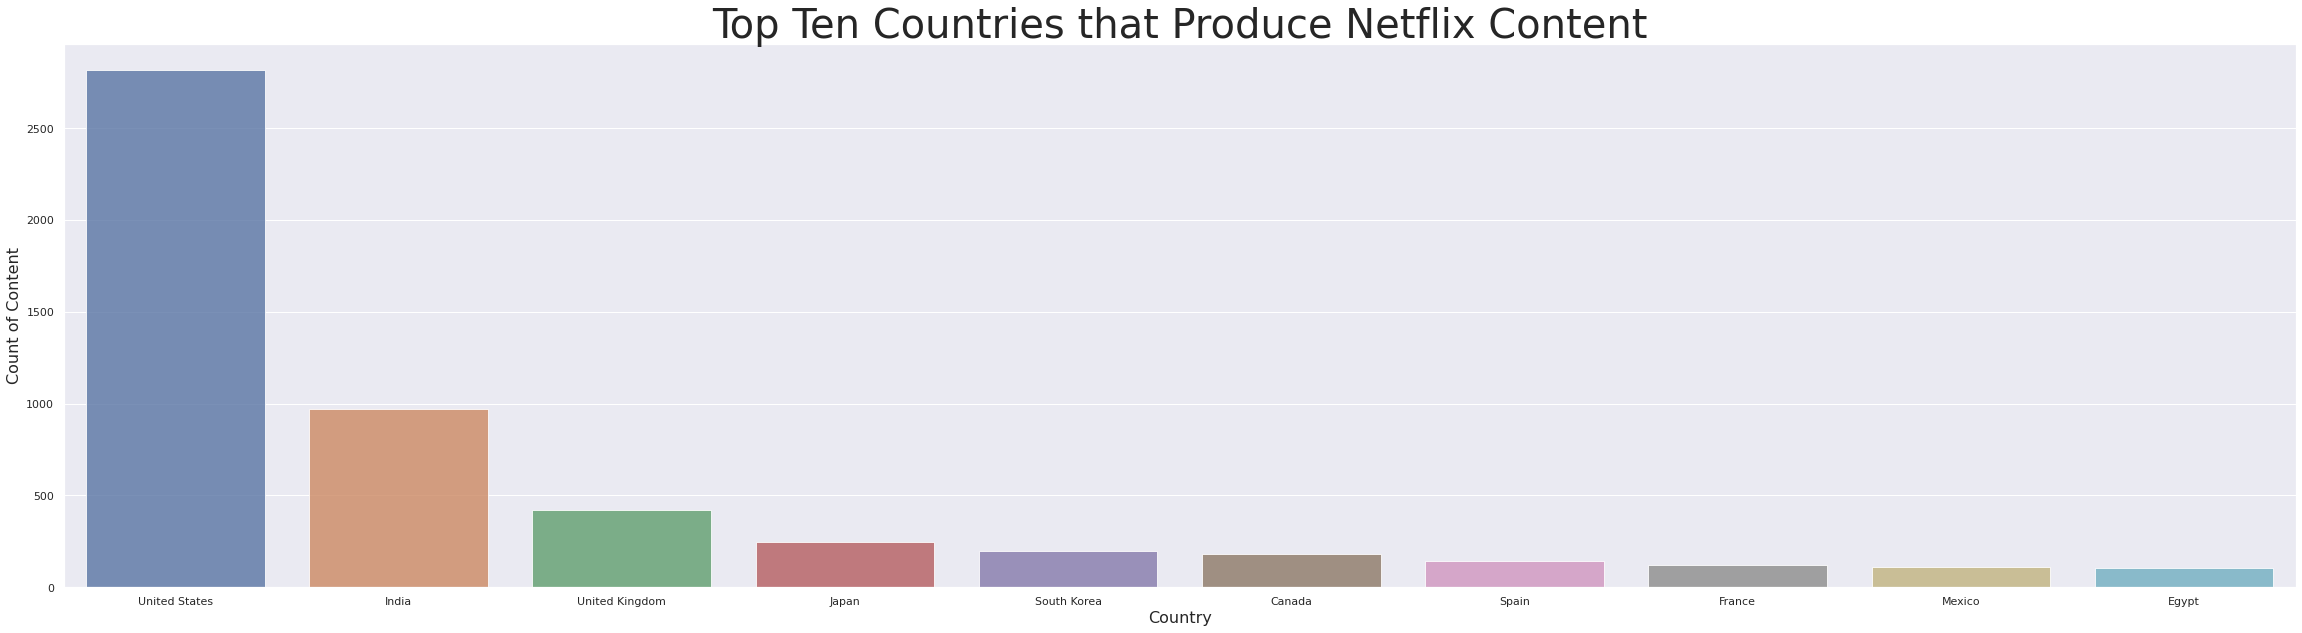

In [65]:
# Visualize count of content that is produced by the top 10 countries 
country_count_new = country_count[:10]
plt.figure(figsize=(40,10))
sns.barplot(country_count_new.index, country_count_new.values, alpha = 0.8)
plt.title('Top Ten Countries that Produce Netflix Content', fontsize = 40)
plt.ylabel('Count of Content', fontsize = 16)
plt.xlabel('Country', fontsize = 16)
plt.show()

We note that the United States is the top producing country of content with them providing 2818 projects. India and the UK follow behind in second and third place with a lower count of projects at 972 and 419. We can see from the graph as well as the numbers above, that the United States is without contest, the top producer for Netflix. 


**Which category is more popular on Netflix? TV-Shows or Movies?**

In [66]:
# How many movies and TV shows are there in total?
type_count = df.type.value_counts()
type_count

Movie      6131
TV Show    2676
Name: type, dtype: int64

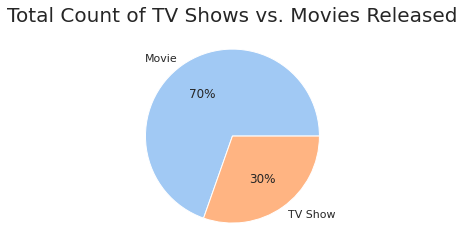

In [84]:
# Visualize total TV Shows vs. Movies released
colours = sns.color_palette('pastel')[0:5]
labels = ['Movie', 'TV Show']
plt.pie(type_count, labels = labels, colors = colours, autopct='%.0f%%')
plt.title('Total Count of TV Shows vs. Movies Released', fontsize = 20)
plt.show()

It is evident that there there is a significantly greater amount of Movies released on Netflix vs. TV Shows.

**Who are the top actors on Netflix?**

In [68]:
# Create a new dataset for the cast count
cast_count = df.copy()
cast_count = pd.concat([cast_count, df['cast'].str.split(",", expand = True)], axis = 1)
cast_count = cast_count.melt(id_vars=["type","title"], value_vars=range(44), value_name="Actor_name")
cast_count = cast_count[cast_count["Actor_name"].notna()]
cast_count["Actor_name"] = cast_count["Actor_name"].str.strip()
cast_count


,type,title,variable,Actor_name
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
380555,TV Show,Social Distance,43,Niles Fitch
382150,TV Show,Creeped Out,43,Andonis Anthony
382475,TV Show,Black Mirror,43,Michael Smiley
382921,TV Show,COMEDIANS of the world,43,Adib Alkhalidey


In [69]:
# View the count of the top 25 actors with in a Netflix production
cast_count.Actor_name.value_counts()[:25]


Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Naseeruddin Shah       32
Takahiro Sakurai       32
Rupa Bhimani           31
Akshay Kumar           30
Om Puri                30
Yuki Kaji              29
Amitabh Bachchan       28
Paresh Rawal           28
Boman Irani            27
Vincent Tong           26
Rajesh Kava            26
Andrea Libman          25
Kareena Kapoor         25
Samuel L. Jackson      24
John Cleese            24
Tara Strong            23
Fred Tatasciore        23
Jigna Bhardwaj         23
Daisuke Ono            22
Ajay Devgn             21
Nawazuddin Siddiqui    21
Junichi Suwabe         21
Name: Actor_name, dtype: int64

Anupam Kher, Shah Rukh Khan and Julie Tejwani are the top three actors that feature in Netflix productions. These are all notably actors from India. In one of our previous questions, we discovered that India was the second highest Country to produce Netflix content. We may make an intial inference then that there is a less variety of actors in Indian productions than there are for American productions.

**In which month is the most content uploaded?**

In [70]:
release_month = df.date_added.dt.month.astype('Int64').value_counts()
release_month

7     827
12    813
9     770
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: date_added, dtype: Int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


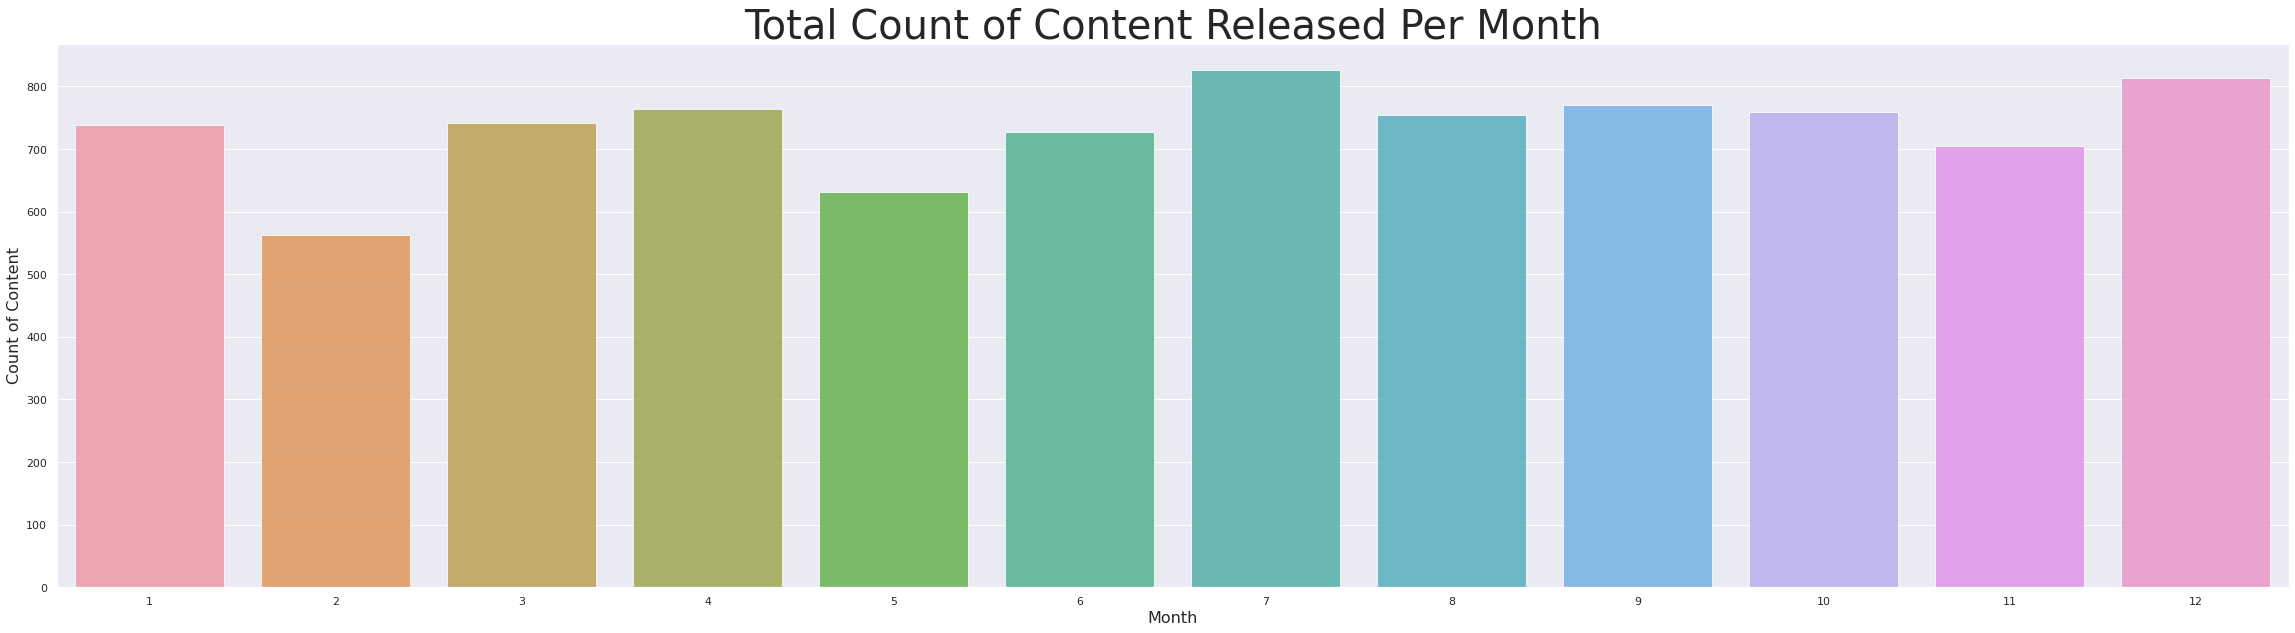

In [71]:
# Visualize count of content released per month.
plt.figure(figsize=(40,10))
sns.barplot(release_month.index, release_month.values, alpha = 0.8)
plt.title('Total Count of Content Released Per Month', fontsize = 40)
plt.ylabel('Count of Content', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.show()

It can be noted that July and December are the top two months in which content is released on Netflix. With our preliminary data analysis one might inference that this is due to majority of the workforce taking their vacation during the summer and holiday months. 

**Which rating of content does Netflix produce the most?**

In [72]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [73]:
# As some of the rating data is noted incorrectly, we will have to search for the correct Maturity rating and replace it.
df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA', 'TV-Y7-FV': 'TV-Y7'})
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'UR'], dtype=object)

In [75]:
rating_count = df.rating.value_counts()
rating_count

TV-MA    3210
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     340
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
UR          3
NC-17       3
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


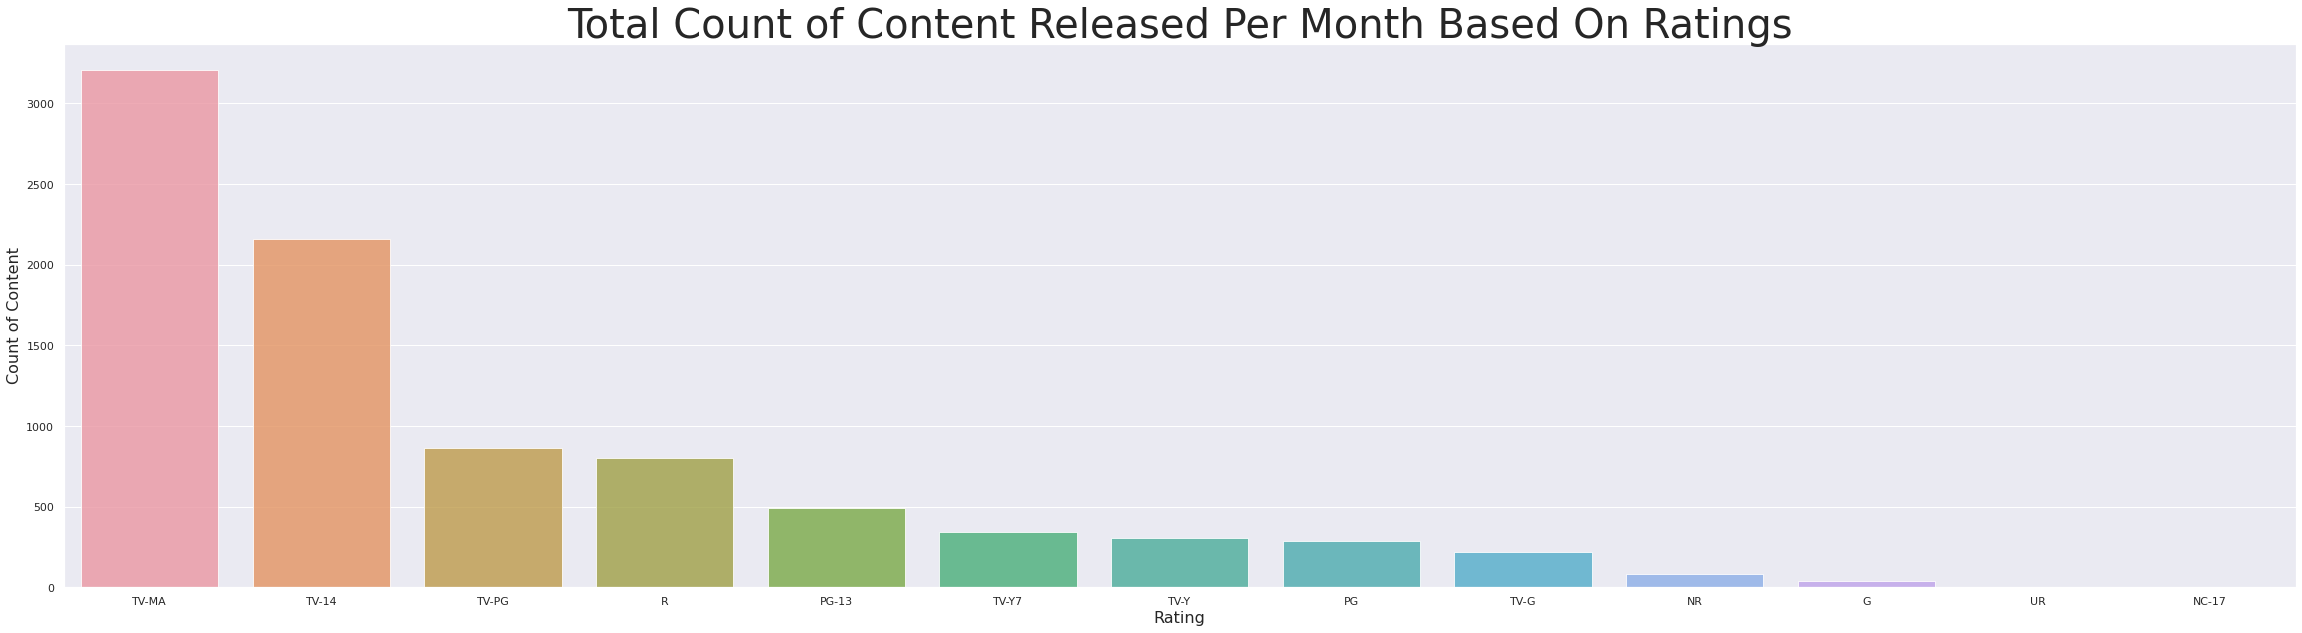

In [76]:
plt.figure(figsize=(40,10))
sns.barplot(rating_count.index, rating_count.values, alpha = 0.8)
plt.title('Total Count of Content Released Per Month Based On Ratings', fontsize = 40)
plt.ylabel('Count of Content', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.show()

From the above graph, we can conclude that the Netflix prioritizes putting out content for mature audiences over any other movie rating demographic. 